In [1]:
from keras import layers, models
from keras.applications import VGG16
%matplotlib inline

Using TensorFlow backend.


In [2]:
sample_path = './data/sample'
train_path = './data/train'
validation_path = './data/validation'
test_path = './data/test'
# dimensions of our images.
img_width, img_height = 150, 150
target_size = (img_width, img_width)
input_shape = (img_width, img_width, 3)

nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

In [3]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [4]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [6]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
# base_dir = '/Users/fchollet/Downloads/cats_and_dogs_small'
train_dir = train_path
validation_dir = validation_path
test_dir = test_path
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
    directory,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 7778*2)
validation_features, validation_labels = extract_features(validation_dir, 7222)
test_features, test_labels = extract_features(test_dir, 1111*2)

Found 15556 images belonging to 2 classes.
Found 7222 images belonging to 2 classes.
Found 2222 images belonging to 2 classes.


In [8]:
train_features = np.reshape(train_features, (15556, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (7222, 4 * 4 * 512))
test_features = np.reshape(test_features, (2222, 4 * 4 * 512))

In [9]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
                loss='binary_crossentropy',
                metrics=['acc'])
history = model.fit(train_features, train_labels,
                epochs=30,
                batch_size=20,
                validation_data=(validation_features, validation_labels))

Train on 15556 samples, validate on 7222 samples
Epoch 1/30
15556/15556 [==============================] - 5s - loss: 0.3814 - acc: 0.8228 - val_loss: 0.2714 - val_acc: 0.8862
Epoch 2/30
15556/15556 [==============================] - 4s - loss: 0.2714 - acc: 0.8835 - val_loss: 0.2430 - val_acc: 0.8963
Epoch 3/30
15556/15556 [==============================] - 4s - loss: 0.2432 - acc: 0.8963 - val_loss: 0.2320 - val_acc: 0.9034
Epoch 4/30
15556/15556 [==============================] - 4s - loss: 0.2224 - acc: 0.9080 - val_loss: 0.2252 - val_acc: 0.9070
Epoch 5/30
15556/15556 [==============================] - 4s - loss: 0.2123 - acc: 0.9117 - val_loss: 0.2214 - val_acc: 0.9101
Epoch 6/30
15556/15556 [==============================] - 4s - loss: 0.2022 - acc: 0.9161 - val_loss: 0.2191 - val_acc: 0.9115
Epoch 7/30
15556/15556 [==============================] - 4s - loss: 0.1962 - acc: 0.9194 - val_loss: 0.2168 - val_acc: 0.9117
Epoch 8/30
15556/15556 [==============================] - 4s -

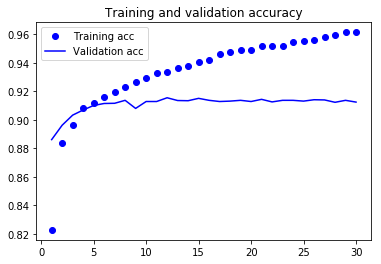

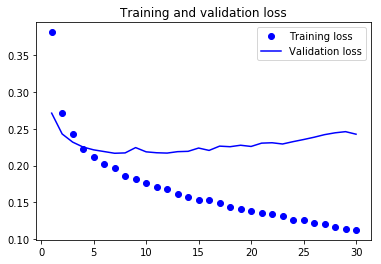

In [10]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()